# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

610


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url for the weather API
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#create list for data
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

#loop through cities
for city in cities:

    #json response
    response_json = requests.get(query_url + city).json()
    
    #retrive items for each field
    try:
        city_id = response_json['id']
        city_id_list.append(city_id)
        
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)
        
        lng = response_json['coord']['lon']
        lng_list.append(lng)
        
        lat = response_json['coord']['lat']
        lat_list.append(lat)
        
        temp = response_json['main']['temp']
        temp_list.append(temp)
        
        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)
        
        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)
        
        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
        
        print(f"City Name: {city}, City ID: {city_id}")
        
    except:
        print("Record not Found, Next city...")
        
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

City Name: kapaa, City ID: 5848280
City Name: albany, City ID: 5106841
City Name: bedesa, City ID: 342559
City Name: puerto ayora, City ID: 3652764
Record not Found, Next city...
City Name: port alfred, City ID: 964432
City Name: porto velho, City ID: 3662762
City Name: esperance, City ID: 2071860
City Name: hithadhoo, City ID: 1282256
City Name: upernavik, City ID: 3418910
City Name: gamba, City ID: 2400547
Record not Found, Next city...
City Name: tuktoyaktuk, City ID: 6170031
City Name: ochakiv, City ID: 698770
City Name: jamestown, City ID: 5122534
City Name: houma, City ID: 4328010
City Name: vestmannaeyjar, City ID: 3412093
City Name: bulgan, City ID: 2032201
City Name: cape town, City ID: 3369157
Record not Found, Next city...
City Name: new norfolk, City ID: 2155415
City Name: ushuaia, City ID: 3833367
City Name: faanui, City ID: 4034551
City Name: qaanaaq, City ID: 3831208
City Name: carauari, City ID: 3664659
City Name: bac lieu, City ID: 1591474
City Name: morro bay, City ID

City Name: touros, City ID: 3386213
Record not Found, Next city...
City Name: bindki, City ID: 1275572
City Name: maymyo, City ID: 1309937
City Name: taguatinga, City ID: 6319623
City Name: lethem, City ID: 3379316
City Name: waseca, City ID: 5051902
City Name: nizhniy kuranakh, City ID: 2019135
City Name: tessalit, City ID: 2449893
Record not Found, Next city...
City Name: the pas, City ID: 6164499
City Name: kahului, City ID: 5847411
City Name: eyl, City ID: 60019
Record not Found, Next city...
Record not Found, Next city...
City Name: pokrovsk, City ID: 704422
City Name: brae, City ID: 2654970
City Name: filimonovo, City ID: 1506834
City Name: kupang, City ID: 2057087
City Name: lompoc, City ID: 5367788
City Name: madhipura, City ID: 1264570
City Name: coihaique, City ID: 3894426
Record not Found, Next city...
City Name: kieta, City ID: 2094027
Record not Found, Next city...
City Name: constitucion, City ID: 3893726
Record not Found, Next city...
City Name: superior, City ID: 527519

City Name: haines junction, City ID: 5969025
City Name: sabang, City ID: 1214026
City Name: papara, City ID: 3395473
City Name: luderitz, City ID: 3355672
City Name: lukovetskiy, City ID: 533418
City Name: rossland, City ID: 6127950
City Name: san jeronimo, City ID: 3929611
City Name: santa vitoria do palmar, City ID: 3449747
City Name: xining, City ID: 1788852
Record not Found, Next city...
City Name: tommot, City ID: 2015179
Record not Found, Next city...
City Name: ajdabiya, City ID: 89113
City Name: bousso, City ID: 2434584
City Name: crestline, City ID: 5340674
City Name: plettenberg bay, City ID: 964712
City Name: hasaki, City ID: 2112802
City Name: byron bay, City ID: 2172880
City Name: eirunepe, City ID: 3664321
City Name: jieshou, City ID: 1805844
City Name: bowen, City ID: 2174444
City Name: nemuro, City ID: 2128975
City Name: benemerito de las americas, City ID: 3816362
City Name: iquique, City ID: 3887127
City Name: miram shah, City ID: 1170367
City Name: arman, City ID: 21

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#convert to data frame
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list, "Temperature": temp_list, "Humidity": humidity_list, "Cloudiness": clouds_list, "Wind Speed": wind_speed_list})

cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed
0,5848280,Kapaa,US,22.0752,-159.3190,80.55,63,40,4.00
1,5106841,Albany,US,42.6001,-73.9662,60.08,81,100,2.42
2,342559,Bedēsa,ET,8.9000,40.7833,59.74,89,100,4.70
3,3652764,Puerto Ayora,EC,-0.7393,-90.3518,72.55,92,28,5.01
4,964432,Port Alfred,ZA,-33.5906,26.8910,67.71,41,93,11.10


In [12]:
#Export csv file
cities_df.to_csv("Output/city_weather.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.


In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = cities_df[cities_df['Humidity']<=100]
len(clean_city_df)

558

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The graph shows the temperature being the highest closest to the equator


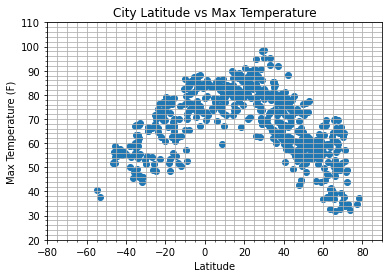

In [92]:
x_values = clean_city_df["Lat"]
y_values = clean_city_df["Temperature"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature")
plt.ylim(20, 110)
plt.xlim(-80, 90)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='-')
plt.show
plt.savefig("Output/lat_temp.png")

print("The graph shows the temperature being the highest closest to the equator")

## Latitude vs. Humidity Plot

The graph shows no real correalion between Humidity and Latitude


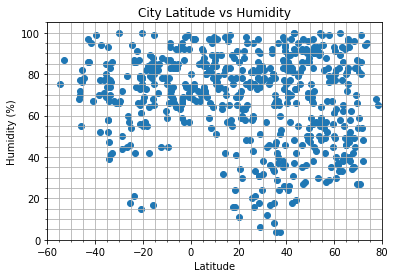

In [86]:

x_values = clean_city_df["Lat"]
y_values = clean_city_df["Humidity"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity")
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='-')
plt.show
plt.savefig("Output/lat_humidity.png")

print("The graph shows no real correalion between Humidity and Latitude")

## Latitude vs. Cloudiness Plot

The graph shows no real correalion between Cloudiness and Latitude


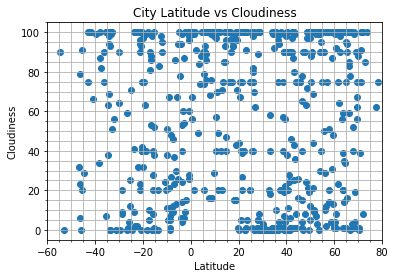

In [85]:
x_values = clean_city_df["Lat"]
y_values = clean_city_df["Cloudiness"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness")
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='-')
plt.show
plt.savefig("Output/lat_Cloudiness.png")

print("The graph shows no real correalion between Cloudiness and Latitude")

## Latitude vs. Wind Speed Plot

The graph shows no real correalion between Wind Speed and Latitude


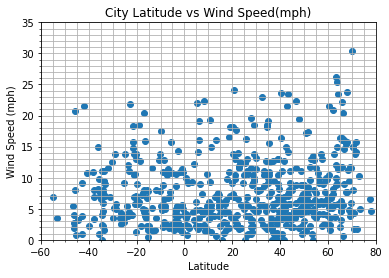

In [84]:
x_values = clean_city_df["Lat"]
y_values = clean_city_df["Wind Speed"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed(mph)")
plt.ylim(0, 35)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle='-')
plt.show
plt.savefig("Output/lat_wind.png")

print("The graph shows no real correalion between Wind Speed and Latitude")

## Linear Regression

In [54]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

In [59]:
mask = cities_df['Lat'] > 0 
northern_hemisphere = clean_city_df[mask]
southern_hemisphere = clean_city_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.54x + 90.39
The r-squared is: -0.7518019566839476
The regression displays a negative correlation.
In the northern hemisphere, as you move away from the equator the temperature decreases.


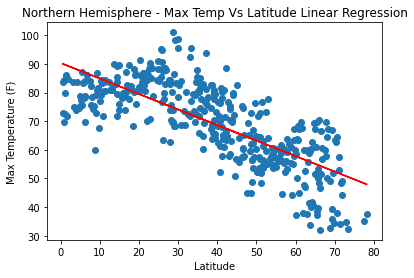

In [83]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 20), fontsize=12, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp Vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the northern hemisphere, as you move away from the equator the temperature decreases.")
plt.show
plt.savefig("Output/NH_lat_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.54x + 90.39
The r-squared is: -0.7518019566839476
The regression displays a positive correlation.
In the southern hemisphere, as you move closer to the equator the temperature increases.


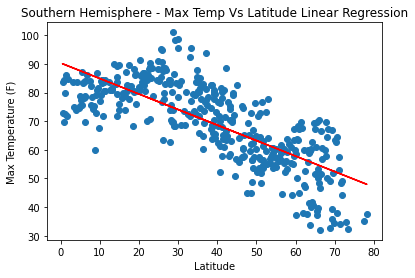

In [82]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 25), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp Vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you move closer to the equator the temperature increases.")
plt.show

plt.savefig("Output/SH_lat_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.15x + 72.08
The r-squared is: -0.12635223959035188
the regression shows no corrolation between data sets


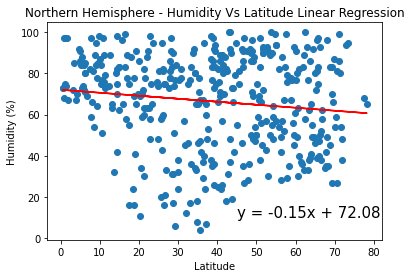

In [81]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 10), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity Vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("the regression shows no corrolation between data sets")
plt.show

plt.savefig("Output/NH_lat_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.15x + 72.08
The r-squared is: -0.12635223959035188
the regression shows no corrolation between data sets


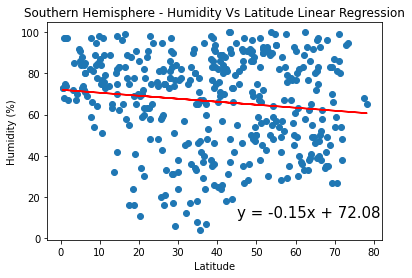

In [80]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (45, 10), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity Vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("the regression shows no corrolation between data sets")
plt.show

plt.savefig("Output/SH_lat_humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.12x + 61.44
The r-squared is: -0.06086680743130822
the regression shows no corrolation between cloudiness and latitude


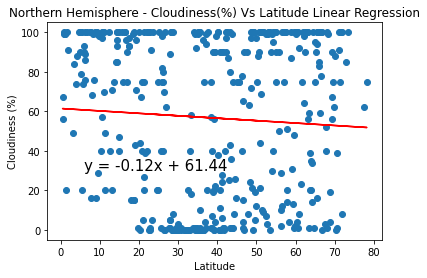

In [79]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 30), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness(%) Vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("the regression shows no corrolation between cloudiness and latitude")
plt.show

plt.savefig("Output/NH_lat_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.12x + 61.44
The r-squared is: -0.06086680743130822
the regression shows no corrolation between cloudiness and latitude


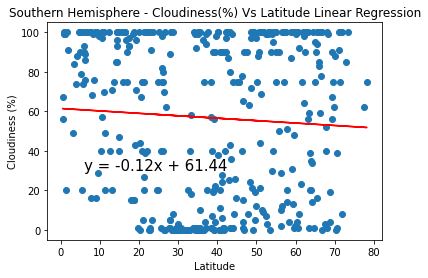

In [78]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 30), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness(%) Vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("the regression shows no corrolation between cloudiness and latitude")
plt.show

plt.savefig("Output/SH_lat_cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 2.65
The r-squared is: 0.16889150871427352
the regression shows no corrolation between data sets


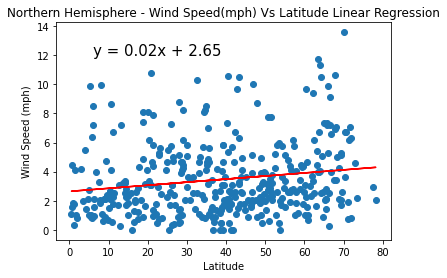

In [77]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 12), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed(mph) Vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("the regression shows no corrolation between data sets")
plt.show

plt.savefig("Output/NH_lat_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.02x + 2.65
The r-squared is: 0.16889150871427352
the regression shows no corrolation between data sets


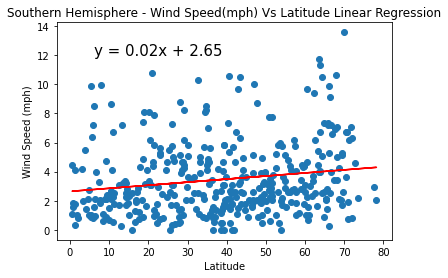

In [88]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6, 12), fontsize=15, color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed(mph) Vs Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("the regression shows no corrolation between data sets")
plt.show

plt.savefig("Output/NH_lat_cloud.png")